K-Means (bevezető példa, kézzel írott számjegyek klaszterezése), <br>
Python klaszterező algoritmusok összehasonlítása (KMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, HDBSCAN)

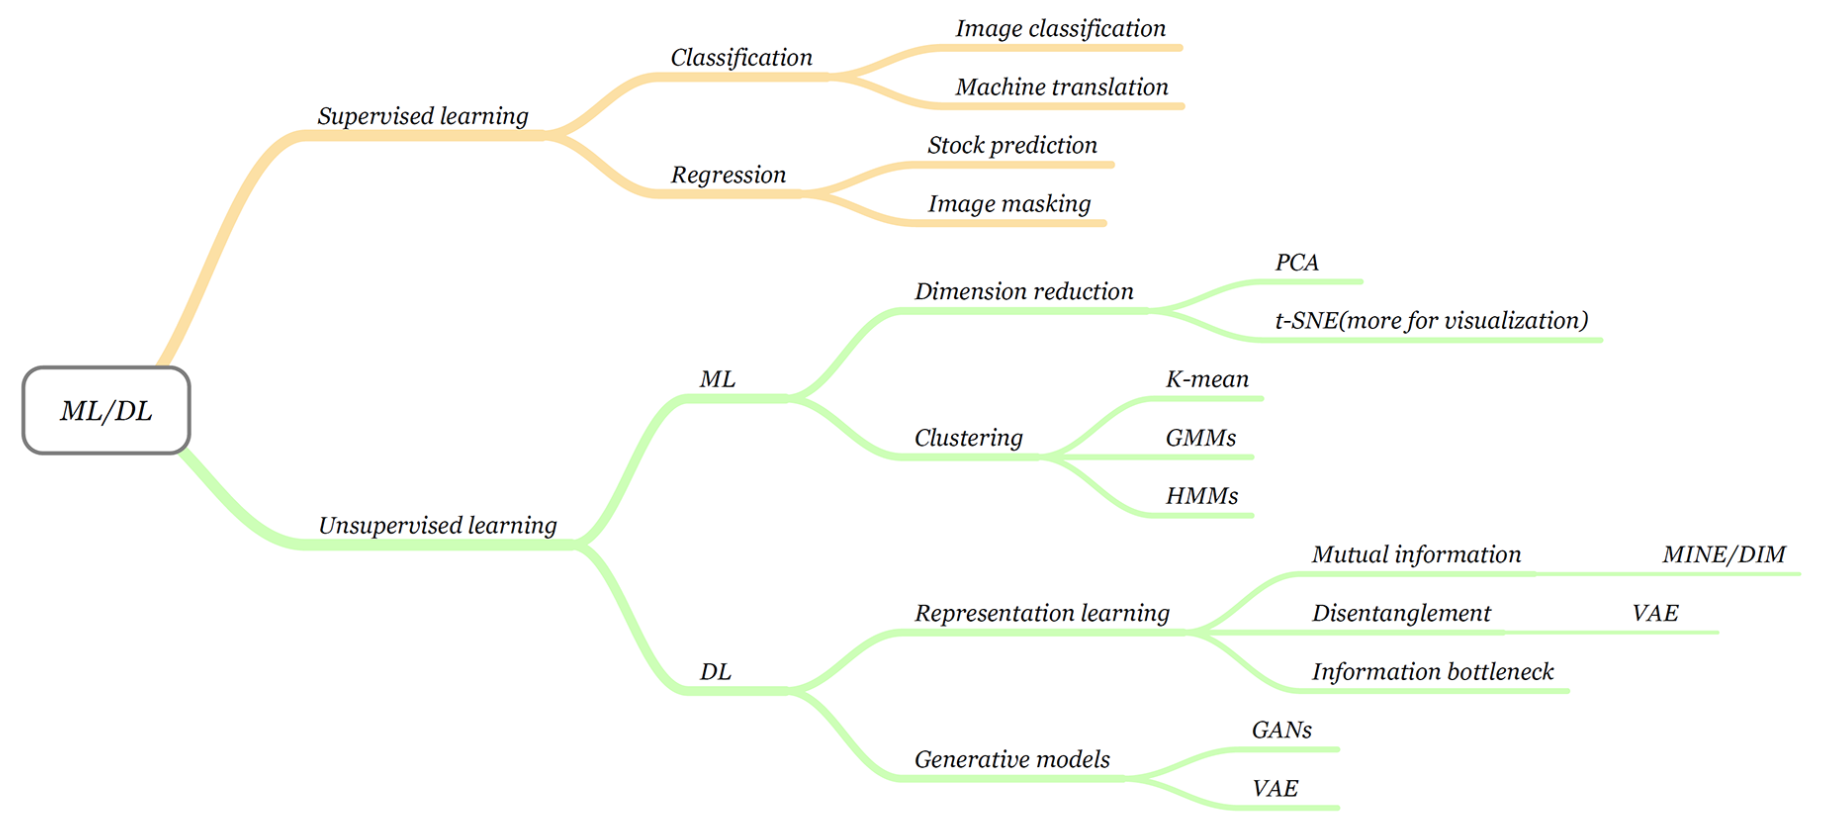

In [34]:
from IPython.display import Image
Image("img/(un)supervised.png",width=1000)

### K-Means algorithm

In [1]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [10]:
# import the make_blobs package


# use the make_blobs function to create the X and y_ture variables
# let n_samples = 500, centers = 4, cluster_std = 0.40, random_state = 0


In [1]:
# check the variables X and y_true


In [2]:
# create a scatter plot from the two coordinates of X 
# HINT: for the x axis you need all the rows of array X and the first column
# set the size of the dots to be 50


# show the plot


In [3]:
# create the model of KMeans algorithm by function KMeans (save it to variable kmeans)
# we want to get 4 clusters


# fit the created model 


# predict with your fitted model (save it to variable y_kmeans)


# create a scatter plot from X like before, just this time add y_kmeans to be the color, and add parameter cmap='viridis'


# show the plot


In [36]:
# read about cmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [4]:
# save the center cooridnates of the clusters to variable centers
# use the kmeans.cluster_centers_ function


# create the same colorful scatter plot as above


# create a scatter plot with x axis: 1.coord of the centers, y axis: 2.coord of the centers
# color it to red, let s=200 and set alpha to 0.5


# show the plot


### Comparing Python Clustering Algorithms

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [7]:
data = np.load('clusterable_data.npy')

An NPY file is a NumPy array file created by the Python software package with the NumPy library installed. It contains an array saved in the NumPy (NPY) file format. NPY files store all the information required to reconstruct an array on any computer, which includes dtype and shape information.

In [8]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

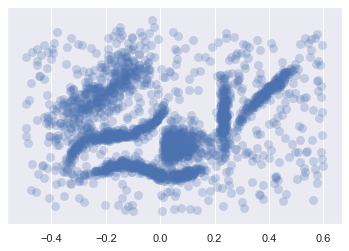

In [11]:
sns.set()
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds) # data.T : transposed array (data[:,0] would do the same)

# hiding the whole axis:
frame = plt.gca() # get current axes (it gets the x and y axes)
frame.axes.get_xaxis().set_visible(True)
frame.axes.get_yaxis().set_visible(False)
#plt.axis("off") 
#plt.show()

In [67]:
# Read about *args and **kwargs here: https://www.programiz.com/python-programming/args-and-kwargs
# *args: 
    # Python allows us to pass the variable number of non keyword arguments to function with *args argument
    # suppose you have a function: def adder(*numbers) 
    # you can call it like this: adder(4,5,6,7)
    # the numbers will be treated as a tuple: (4,5,6,7) (so you can e.g. iterate over it)
# **kwargs:
    # Python allows us to pass the variable length of keyword arguments to the function with **kwargs argument
    # a function with param **data (e.g. def intro(**data))
    # will wait for parameters in format key='value'
    # e.g. intro(Firstname="Sita", Lastname="Sharma", Age=22, Phone=1234567890)
    # and it will treat the data as a dictionary

In [25]:
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    print(np.unique(labels))
    palette = sns.color_palette('deep', np.unique(labels).max() + 1) # np.unique gives the unique clusters (e.g.[0,1,2,3,4,5])
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.65, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

[0 1 2 3 4 5]


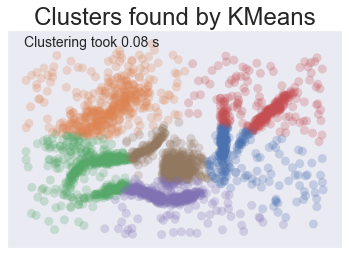

In [26]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})

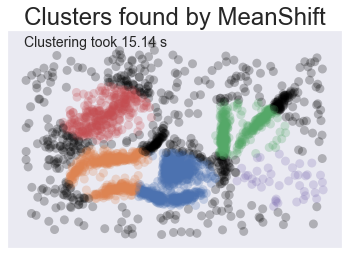

In [15]:
plot_clusters(data, cluster.MeanShift, (0.175,), {'cluster_all':False})
# for 1-element tuple we have to add a comma

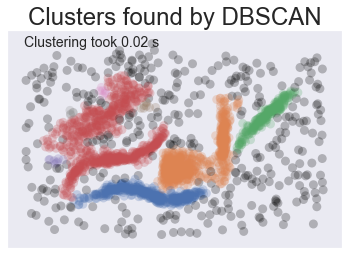

In [18]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.025})

### Gaussian Mixture Model

##### the data

In [32]:
import pandas as pd
data = pd.read_csv('Clustering_gmm.csv')

plt.figure(figsize=(5,5))
plt.scatter(data["Weight"],data["Height"], s=20)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

FileNotFoundError: [Errno 2] File b'Clustering_gmm.csv' does not exist: b'Clustering_gmm.csv'

##### k-means model

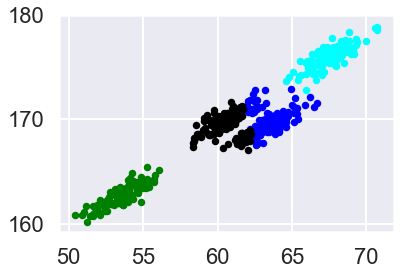

In [139]:
#training k-means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

#predictions from kmeans
pred = kmeans.predict(data)
frame = pd.DataFrame(data)
print(frame)
frame['cluster'] = pred
frame.columns = ['Weight', 'Height', 'cluster']

#plotting results
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k], s=30)
plt.show()



In [141]:
# of course K-means works in the usual way as well

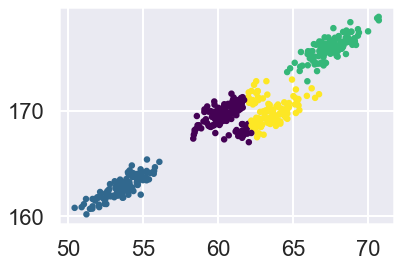

In [142]:
data = pd.read_csv('Clustering_gmm.csv')
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
pred = kmeans.predict(data)
plt.scatter(data['Weight'], data['Height'], c = pred, s = 20, cmap = 'viridis')
# show the plot
plt.show()

##### Gaussian Mixture Model

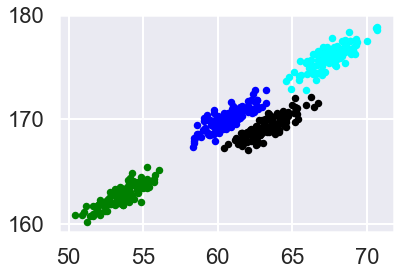

In [143]:
import pandas as pd
data = pd.read_csv('Clustering_gmm.csv')

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data)

#predictions from gmm
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k], s=30)
plt.show()


### k-means on digits

In [152]:
# load the Python's digits dataset (import the load_digits package, use the load_digits() funciton), call it digits
from sklearn.datasets import load_digits
digits = load_digits()

In [153]:
# check the digits variable
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [154]:
# check the data parameter of digits (digits.data)
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [155]:
# you can see that digits.data contains 1797 points(numbers) each having 64 dimensions(digits)
# How do I know these numbers? 
# I checked the shape of digits.data. Check it yourself too:
digits.data.shape

(1797, 64)

So we have 1797 points of dimension 64. (All the 1797 points have 64 coordinate.)

In [156]:
# let's create a kmeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10, random_state=0)
# fit the model and predict on the digits.data dataset: clusters (HINT: you can use the kmeans.fit_predict function)
clusters = kmeans.fit_predict(digits.data)

What did we do till this point?

We used the kmeans algorithm for our 64-dimensional points:

1. We randomly put 10 cluster centers in the 64 dimension space
2. For each of our points (1797 points of dimension 64) we assigned the closest cluster center (we color each point) (10 colors)
3. We got 10 clusters, we calculate the "average" of the points of each cluster, the averages give the new cluster centers
4. We create new clusters for the new cluster centers: we connect each point to the closest cluster center
5. repeat the steps (until convergence)

Finally we get 10 clusters: in each of them there is different hand-written formats of one exact number (hopefully only one number is in one group and only few mistakes are present) 

In [157]:
# check the shape of the cluster centers
kmeans.cluster_centers_.shape 

(10, 64)

We can see that there are 10 cluster centers of 64 dimension.

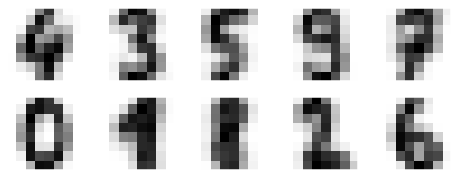

In [171]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8) #10 db középpont, mindegyik 64 dimenziós pont => 640 koordináta #8x8képkocka

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[]) # to not to show label
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [175]:
from scipy.stats import mode

labels = np.zeros_like(clusters) # array of zeros with the same shape as the 'clusters' 
for i in range(10): # go through the 10 cluster groups
    mask = (clusters == i) 
    labels[mask] = mode(digits.target[mask])[0] # módusz
labels # these are the predicted labels

array([0, 8, 8, ..., 8, 9, 9])

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

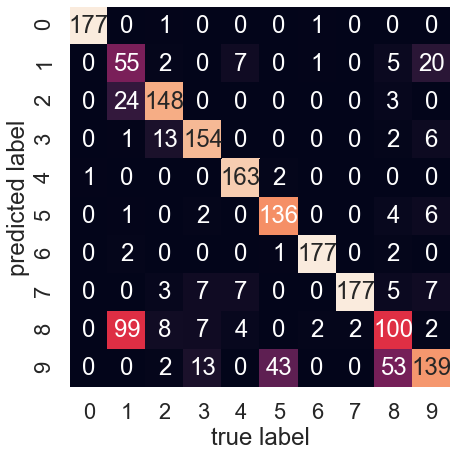

In [29]:
from sklearn.metrics import confusion_matrix
plt.figure(1, figsize=(10, 7))
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label'); #semi-colon is used to prevent output from the code line